In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
iris['Species'].value_counts() #balanced data

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

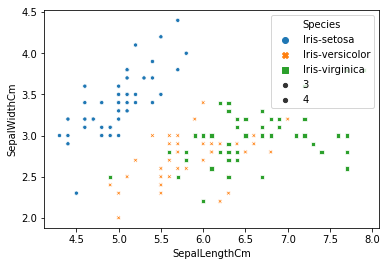

In [0]:
#let's print scatter plot
#iris.plot(kind='scatter',x="SepalLengthCm",y="SepalWidthCm")
#plt.show()
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species",style="Species", size=4, data=iris,legend='brief')

DataWrangling

In [0]:
file_handler = open("Iris.csv", "r")
d= pd.read_csv(file_handler, sep = ",") 
file_handler.close()
Species = {'Iris-setosa': 1,'Iris-virginica': 2,'Iris-versicolor': 3} 
d.Species= [Species[item] for item in d.Species] 
iris=d
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [0]:
iris.drop("Id",axis=1,inplace=True)
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [0]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [0]:
# for later use this can also be used. Just for reference
#model.fit(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], iris[['Species']]
#y_pred = model.predict(X_test)
#print(metrics.accuracy_score(y_test, y_pred))


Test and Train and Model

In [0]:
X=iris.drop("Species",axis=1)
y=iris["Species"]
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)


In [0]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [0]:
X_train.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
6,4.6,3.4,1.4,0.3
88,5.6,3.0,4.1,1.3
39,5.1,3.4,1.5,0.2
74,6.4,2.9,4.3,1.3
112,6.8,3.0,5.5,2.1


In [0]:
X_test.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
128,6.4,2.8,5.6,2.1
18,5.7,3.8,1.7,0.3
130,7.4,2.8,6.1,1.9
105,7.6,3.0,6.6,2.1
107,7.3,2.9,6.3,1.8


In [0]:
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [0]:
y_train.head(5)

6      1
88     3
39     1
74     3
112    2
Name: Species, dtype: int64

In [0]:
y_test.head(5)

128    2
18     1
130    2
105    2
107    2
Name: Species, dtype: int64

In [0]:
from matplotlib.colors import ListedColormap

In [0]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
model=KNeighborsClassifier(n_neighbors=5)


In [0]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = model.predict(X_test)
print(y_pred) #predicted species

[2 1 2 2 2 3 2 1 1 2 1 1 1 2 2 1 3 1 1 2 1 2 3 1 1 1 1 1 1 2 3 1 2 1 3 2 2
 3 3 1 2 1 3 1 2 1 1 3 3 2 1 3 2 2 3 3 1 3 2 3]


In [0]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred)) #evaluate our knn model

[[25  0  0]
 [ 0 18  0]
 [ 0  2 15]]


In [0]:
print(classification_report(y_test,y_pred)) #classification report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       0.90      1.00      0.95        18
           3       1.00      0.88      0.94        17

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



In [0]:
from sklearn.metrics import accuracy_score

In [0]:
prediction=model.predict(X_test)

In [0]:
w=accuracy_score(y_test,prediction)*100
print(w,'%')

96.66666666666667 %
